In [23]:
import numpy as np
import cv2

# Load the image
right_patch = cv2.imread('calibration_green.png')
left_patch = cv2.imread('calibration_red.png')

# crop image to be 161x161 pixels
right_patch = right_patch[0:161, 0:161]
left_patch = left_patch[0:161, 0:161]

np.seterr(invalid='ignore')
I_right = right_patch.sum(axis=2)
I_left = left_patch.sum(axis=2)
I_right[I_right == 0] = 100000
I_left[I_left == 0] = 100000

r_right = right_patch[:,:,2] / I_right
g_right = right_patch[:,:,1] / I_right

r_left = left_patch[:,:,2] / I_left
g_left = left_patch[:,:,1] / I_left



In [31]:
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
right_patch = cv2.cvtColor(right_patch, cv2.COLOR_BGR2RGB)
left_patch = cv2.cvtColor(left_patch, cv2.COLOR_BGR2RGB)


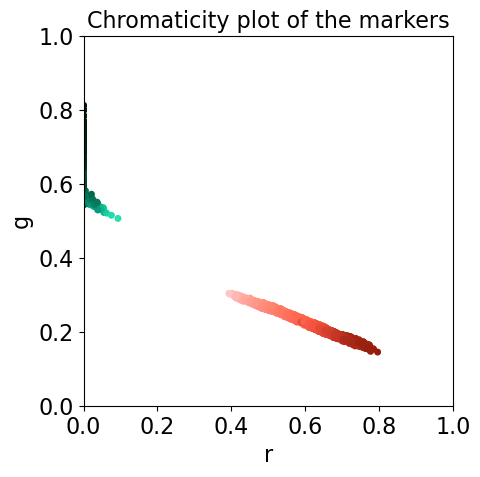

In [68]:
# Display the image
#plt.imshow(left_patch)
#plt.show()

# Concatenate r_left and r_right
r = np.concatenate((r_left, r_right), axis=1).flatten()
g = np.concatenate((g_left, g_right), axis=1).flatten()
# concatenate left patch and right patch
colors = np.concatenate((left_patch, right_patch), axis=1).reshape((left_patch.shape[0] * left_patch.shape[1] * 2, 3))/255

r = r.flatten()
g = g.flatten()
# scatter plot r and g in the same figure
# make the axis values range from 0 to 1
plt.axis([0, 1, 0, 1])
plt.xlabel('r')
plt.ylabel('g')
# change plot title
plt.title('Chromaticity plot of the markers')
# make the axis labels bigger and bold
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('figure', titlesize=16)
# make the points smaller
plt.scatter(r, g, s=16, c=colors, cmap='hsv')
# save the figure
# equalize aspect ratio of plot
plt.gca().set_aspect('equal', adjustable='box')
# save the figure with transparent background
plt.savefig('chromaticity_plot.png', transparent=True)
plt.show()


In [64]:

plt.savefig('chromaticity.png', dpi=300)

<Figure size 640x480 with 0 Axes>